# Machine Learning 2024/2025 - Progress Task 2 (Data Preprocessing)

## Introduction

**Statement for the task:**

In this competition-style task, your objective is to build a predictive model that estimates the likelihood of individuals receiving two different vaccines: the H1N1 flu vaccine and the seasonal flu vaccine. You will create two separate probability predictions for each individual in the dataset: 
- h1n1_vaccine: The probability that an individual receives the H1N1 flu vaccine. 
- seasonal_vaccine: The probability that an individual receives the seasonal flu vaccine. 

All the information about the task is on the following site: 
https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

## Preparation of Environmental Variables

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
PATH_DATA = 'data/'
train_features = pd.read_csv(PATH_DATA + 'training_set_features.csv')
train_labels = pd.read_csv(PATH_DATA + 'training_set_labels.csv')
test_features = pd.read_csv(PATH_DATA + 'test_set_features.csv')

## Exploratory Data Analysis (EDA)

Let's focus first on training data.

## Dataset description

In [ ]:
# Check dataset columns, and dytpes for features
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Taking a look at this summary of the dataset info, we can see that there are different values for Non-Null count for each column. This means that there are missing values in the dataset. We will have to deal with them later.

In [27]:
# Check the first 3 rows of the dataset
train_features.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [ ]:
# Check labels dataset
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [25]:
train_labels.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


We can see that both datasets share one column, which is `respondent_id`. This column is the unique identifier for each respondent is use to relate the two datasets. We will set this column as the index for both datasets.

In [ ]:
# Set the ID as index
train_features.set_index('respondent_id', inplace=True)
train_labels.set_index('respondent_id', inplace=True)

Also, we will merge both datasets into one, so we can have all the information in one place and not having to deal with several variables.

In [ ]:
df_patients = pd.concat([train_features, train_labels], axis=1)
# Check that the columns are concatenated
df_patients.columns

------------


## Null values

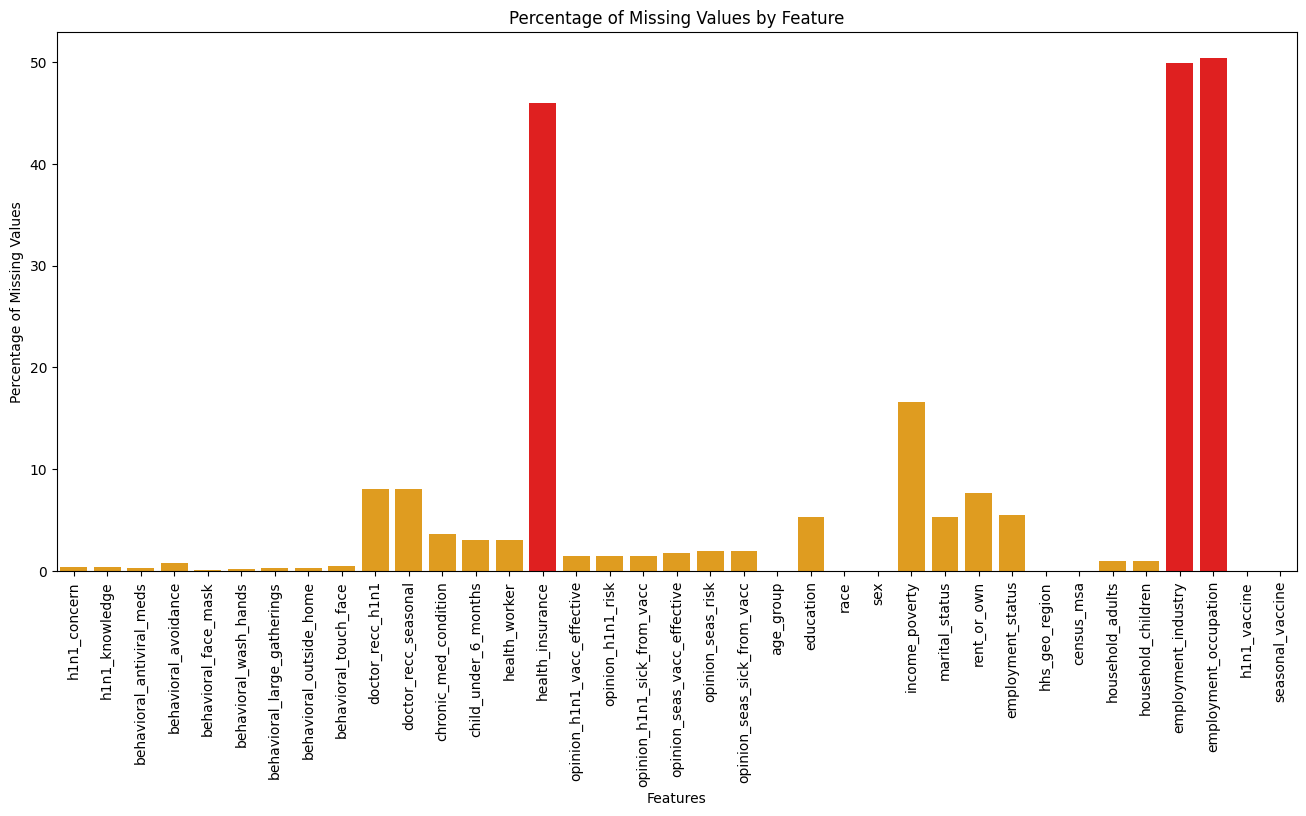

In [52]:
null = df_patients.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(df_patients)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

## Next Step